In [2]:
%pip install numpy
%pip install scipy

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 110.1 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.6 kB 110.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.6 kB 164.3 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 201.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/45.9 MB 1.5 MB/s eta 0:00:31
   ---------------------------------------- 0.3/45.9 MB 3.5 MB/s eta 0:00:14
    -----------------------------------

In [131]:
import numpy as np

# Constants for the Ziggurat algorithm
N_LAYERS = 256
R = 3.442619855899
V = 9.91256303526217e-3

# Precomputed values for layers (base and height)
X = np.zeros(N_LAYERS)
Y = np.zeros(N_LAYERS)

for i in range(N_LAYERS):
    X[i] = R / V + i * V
    Y[i] = np.exp(-0.5 * X[i] ** 2)

def ziggurat_normal():
    while True:
        # Generate uniform random variables
        U = np.random.rand()
        i = int(U * N_LAYERS)
        if i < N_LAYERS:
            # Layer i: Generate sample using rejection sampling
            Z = U * X[i]
            if U < Y[i]:
                return Z
        else:
            # Layer N_LAYERS: Generate sample directly
            Z = -np.log(np.random.rand())
            if np.random.rand() < 0.5:
                return Z
            else:
                return -Z

# Generate N samples from N(0, 1)
N = 10000
samples = [ziggurat_normal() for _ in range(N)]

samples


KeyboardInterrupt: 

Using box-muller transformation

In [129]:
import numpy as np

U1 = np.random.rand(B, N)
U2 = np.random.rand(B, N)

Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
#Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

X = np.cumsum(Z0, axis=1)

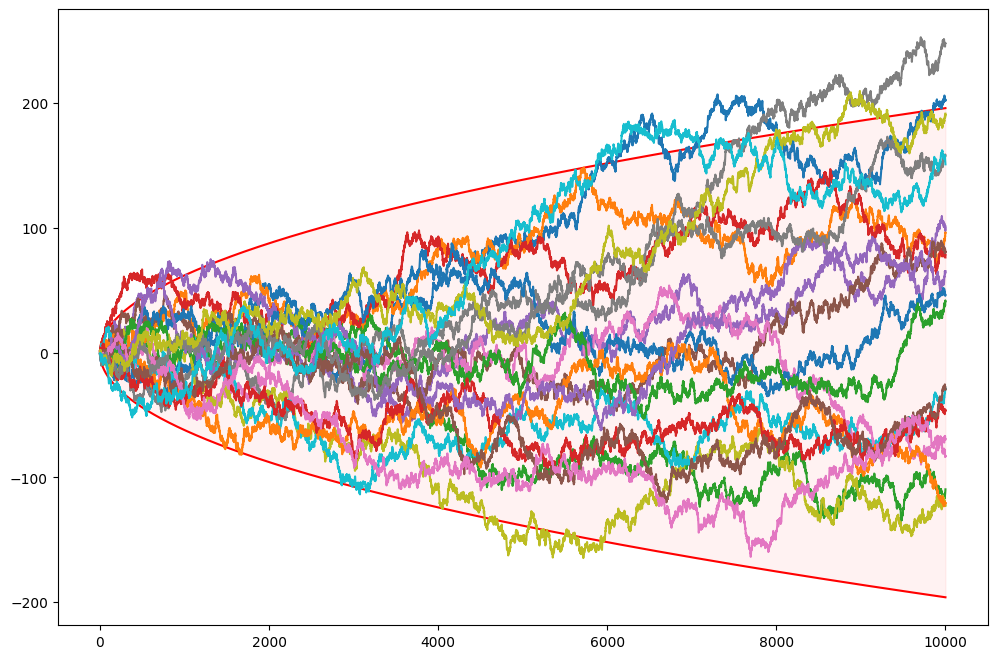

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()

Using LCG

In [123]:
import numpy as np

a = 1233
c = 0
m = 2323

X_0 = 0

B = 20
N = 10000

U = np.zeros((B, N))
X_i = X_0
for i in range(N):
    X_i = (a * X_i + c) % m
    U[:, i] = X_i

Y = np.where(U < m / 2, 1, -1)

X = np.cumsum(Y, axis=1)


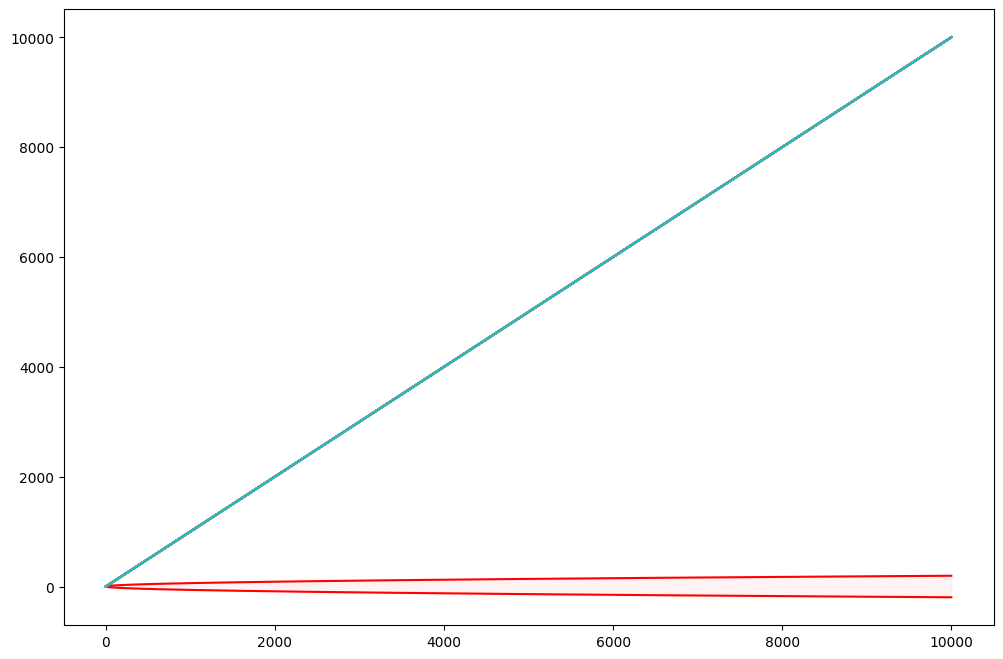

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()

Using inverse cdf

In [119]:
import numpy as np

N = 10000
B = 20

U = np.random.rand(B, N)

def inverse_cdf(u):
    return np.where(u <= 0.5, 1, -1)

X = np.cumsum(inverse_cdf(U), axis=1)

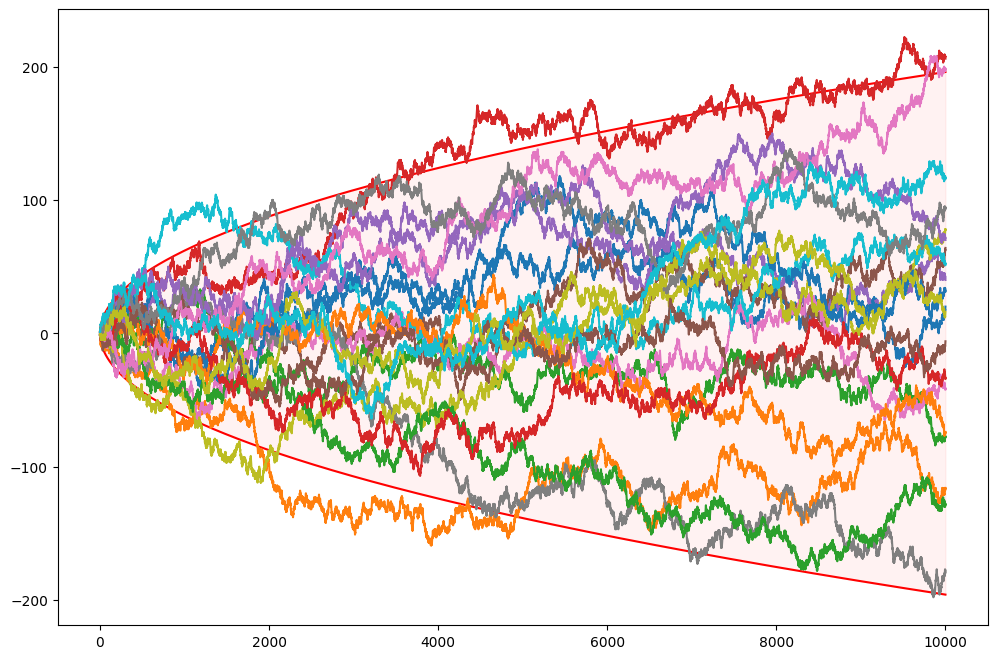

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()

In [100]:
import numpy as np
from scipy.stats import norm, bernoulli

N = 10000
B = 20

Y = 2 * bernoulli.rvs(p=1/2, loc=0, size=(B, N), random_state=0) - 1
X = np.cumsum(Y, axis=1)

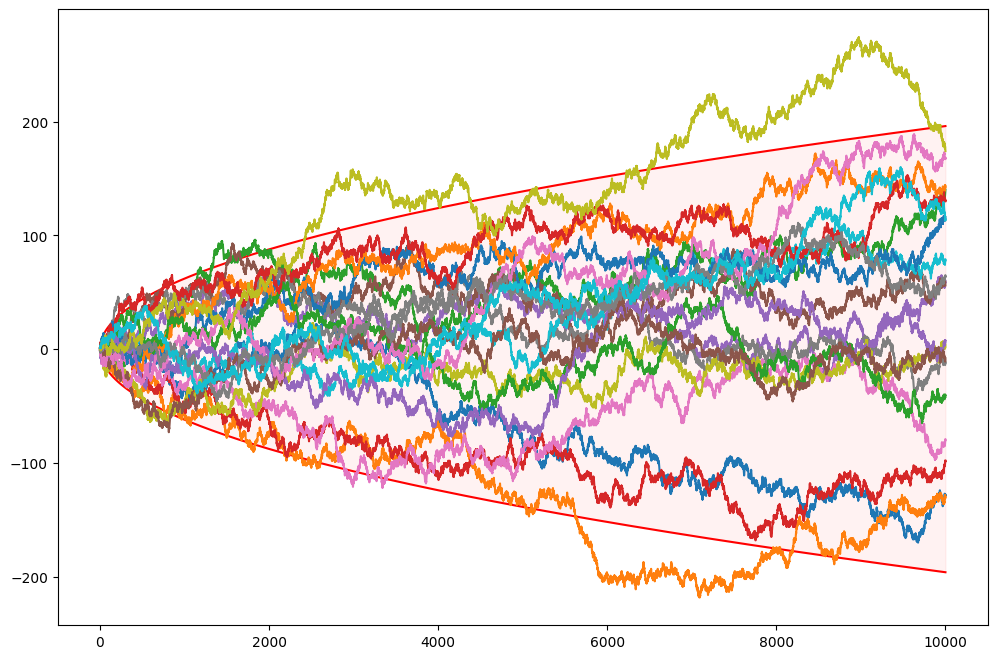

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

nn = np.arange(1, N + 1)

z = norm.ppf(0.975)
plt.plot(nn, z * np.sqrt(nn), color='red')
plt.plot(nn, -z * np.sqrt(nn), color='red')
plt.fill_between(nn, z * np.sqrt(nn), -z * np.sqrt(nn), color='red', alpha=0.05)

for b in range(B):
    plt.plot(nn, X[b])

plt.show()